In [ ]:
#Upload data to colab environment
from google.colab import files
files.upload()

In [ ]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Read the dataset. Data can be found at "https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?resource=download"
df = pd.read_csv('data.csv')

In [ ]:
#Print first few values
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
#Check for missing values
df.isna().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [ ]:
#Remove unwanted columns
df = df.drop('Unnamed: 32', axis=1)

In [ ]:
#Check for class types
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [ ]:
#Import label encoder for target variable
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()

In [ ]:
#Encode class labels as integers
df['diagnosis_enc'] = lab_enc.fit_transform(df['diagnosis'])

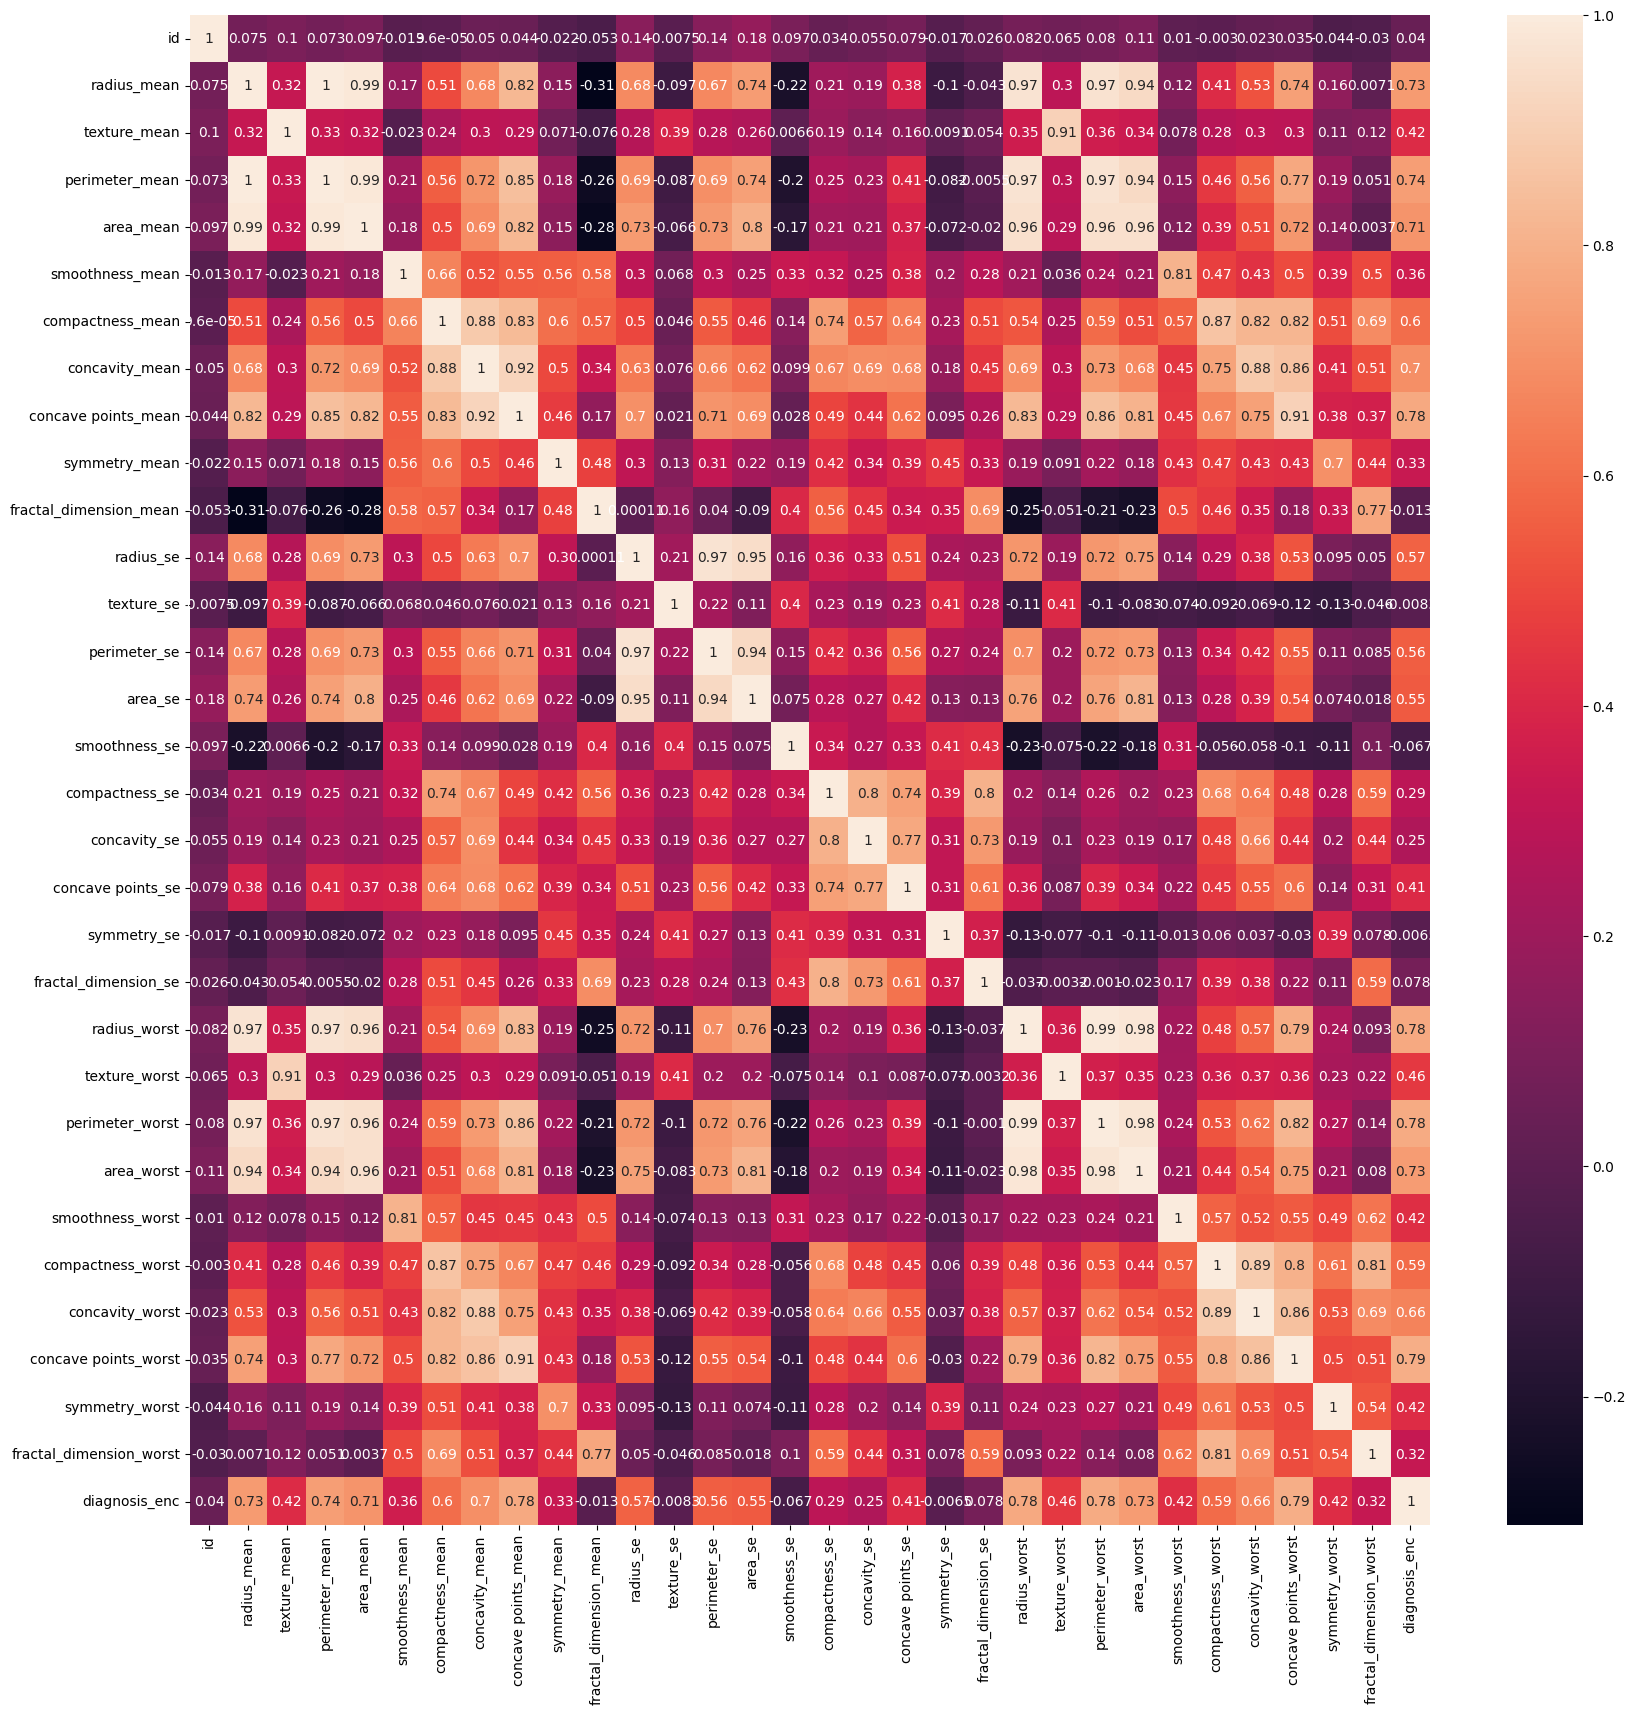

In [ ]:
#Calculate and display correlations between features and target
correlations = df.corr()
plt.figure(figsize=(20,20),dpi=100)
sns.heatmap(correlations, annot=True)

In [ ]:
#Get all features and target label into separate frames
X = df.drop(['id', 'diagnosis', 'diagnosis_enc'], axis=1)

Y = df['diagnosis_enc']

In [ ]:
#Get highest correlated feature
X2 = X['concave points_worst']

In [ ]:
#Create train and test data splits
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X2, Y, test_size = 0.2)

In [ ]:
#Import logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
#Train the model with one feature
model.fit(x_train.to_numpy().reshape(-1, 1), y_train)

LogisticRegression()

In [ ]:
#Perform prediction
model_pred = model.predict(x_test.to_numpy().reshape(-1,1))

In [ ]:
#Import evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
#Print model accuracy
print(accuracy_score(model_pred, y_test))

0.7368421052631579


In [ ]:
from sklearn.model_selection import train_test_split

#Create train test split for all features
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [ ]:
#Get second model
model2 = LogisticRegression(verbose=1)

In [ ]:
#Train the model with all features
model2.fit(x_train, y_train)

In [ ]:
#Make prediction on trained model
model2_pred = model2.predict(x_test)

In [ ]:
#Print model accuracy
print(accuracy_score(model2_pred, y_test))

0.9298245614035088


In [ ]:
#Create classification report
print(classification_report(model2_pred, y_test))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        78
           1       0.89      0.89      0.89        36

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114

